In [5]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

In [6]:
model = load_model("final_inceptionresnetv2_deepfake_model_99_new.keras")


# Evalute Model on New Dataset


In [19]:
import tensorflow as tf
import os
base_path = r"C:\Users\mahdi\Downloads\Compressed\archive_2\dataset"

eval_path = tf.keras.utils.image_dataset_from_directory(
    
    os.path.join(base_path,"val"),
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

evaluate = eval_path.map(lambda image, label: (tf.cast(image, tf.float32) / 255.0, label))


Found 1218 files belonging to 2 classes.


In [20]:
loss, accuracy = model.evaluate(evaluate, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.9415 - loss: 0.1978
Test Loss: 0.2215
Test Accuracy: 94.2529%


# Test Custom Image

In [ ]:
import tensorflow as tf

path_to_image = r"C:\Users\mahdi\Desktop\mobile-07.jpg"
img = tf.keras.utils.load_img(path_to_image, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 
img_array = img_array / 255.0  

predictions = model.predict(img_array)
print("Raw prediction:", predictions[0][0])

label = "Real" if predictions[0][0] >= 0.5 else "Fake"
print("Predicted label:", label) 

# Test Custom Images With Plotting

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Raw prediction: 3.633459346019663e-05
Predicted label: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Raw prediction: 0.999998927116394
Predicted label: Real


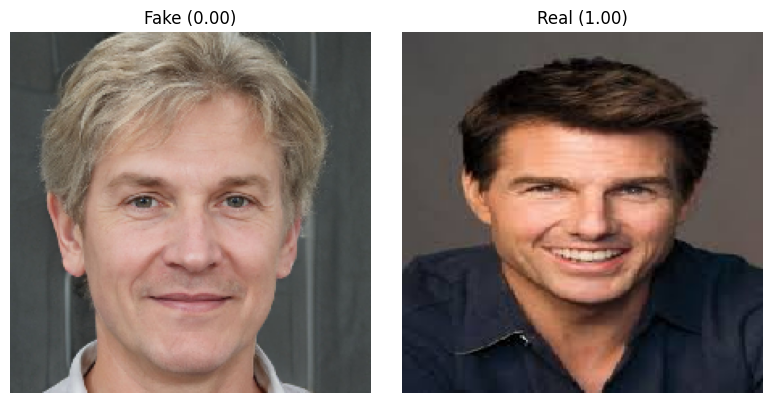

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

path_to_image1 = r'C:\Users\mahdi\Desktop\mobile-07.jpg'
path_to_image2 = r"C:\Users\mahdi\Desktop\images.jpg"

def load_and_predict(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    prediction = float(model.predict(img_array)[0][0]) 
    print("Raw prediction:", prediction) 
    label = "Real" if prediction >= 0.5 else "Fake"
    print("Predicted label:", label) 
    return img, label, prediction

img1, label1, pred1 = load_and_predict(path_to_image1)
img2, label2, pred2 = load_and_predict(path_to_image2)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(f"{label1} ({pred1:.2f})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(f"{label2} ({pred2:.2f})")
plt.axis('off')

plt.tight_layout()
plt.show()
